# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Feature Scaling

Consider a dataset with multiple features spanning varying degrees of magnitude, range, and units. 
This is a significant obstacle as a few machine learning algorithms are highly sensitive to these features.

For example, consider the case where one feature is entirely in kilograms while the other is in grams, another one is liters, and so on. How can we use these features when they vary so vastly in terms of what they are presenting?

Here is where the concept of _feature scaling_ arises. 
It is a crucial part of the data preprocessing stage but it is very common that a lot of beginners overlook it (to the detriment of their machine learning models).

Here is the curious thing about feature scaling – it improves (significantly) the performance of some machine learning algorithms and does not work at all for others. 
What could be the reason behind this quirk?

Also, what is the difference between normalisation and standardisation? 

These are two of the most commonly used feature scaling techniques in machine learning but a level of ambiguity exists in their understanding. 
When should you use which technique?

Let's answer these questions and see how to build a feature scaler in python.



In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn variables engineering
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = "retina"

# set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 13)})

### Why should one use Feature Scaling?

The first question we need to address – why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Let's explain that in more detail.

#### Gradient Descent Based Algorithms

A lot of machine learning algorithms are trained by a minimisation of some cost function.

<p align="center">
    <img width="1501" alt="image" src="https://user-images.githubusercontent.com/49638680/159128331-9cc52e0b-8867-47c6-baa6-daef70963b58.png">
</p>

For a linear regression model, the update formula for $\beta$ parameters is

$$ \beta_j = \beta_j - \alpha \frac{1}{n}\sum_{k=1}^n\left( h_\beta(x_k) - y_k \right)x_k \, .$$

The presence of feature value $x$ in the formula will affect the step size of the gradient descent. 

The difference in ranges of features will cause different step sizes for each feature. 
To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

Having features on a similar scale can help the gradient descent converge more quickly towards the minima.

#### Distance-Based Algorithms

Distance algorithms like KNN are most affected by the range of features. 
This is because behind the scenes they are using distances between data points to determine their similarity.

For example, let’s say we have data containing high school scores of students (ranging from 0 to 5) and their future incomes (in thousands Euros):

|    | Student     |   Average grade   |   Salary (k€)         |
|---:|:------------|------------------:|----------------------:|
|  0 | Oscar       |               9.2 |                    65 |
|  1 | Tony        |               9.4 |                  1324 |
|  2 | Peter       |               9.8 |                    23 |
|  3 | Bruce       |               8.7 |                    90 |
|  4 | Natasha     |               4.3 |                    70 |


Since both the features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.

Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

|    | Student     |   Average grade   |   Salary (k€)         |
|---:|:------------|------------------:|----------------------:|
|  0 | Oscar       |         1.184341  |                  0.54 |
|  1 | Tony        |         1.185432  |                  1.67 |
|  2 | Peter       |         1.267535  |                  0.13 |
|  3 | Bruce       |         1.165346  |                  0.83 |
|  4 | Natasha     |         -0.954375 |                  0.67 |

The effect of scaling is conspicuous when we compare the _Euclidean distance_ between data points for students Oscar and Peter, and between Tony and Peter, before and after scaling as shown below.

- Euclidean distance Oscar-Peter before scaling

$$ \sqrt{(65-23)^2 + (9.2-9.8)^2} \simeq 42.004 \, ,$$

- Euclidean distance Tony-Peter before scaling

$$ \sqrt{(1324-23)^2 + (9.4-9.8)^2} \simeq 1301 \, ,$$

- Euclidean distance Oscar-Peter after scaling

$$ \sqrt{(0.54-0.13)^2 + (1.184-1.268)^2} \simeq 0.42 \, ,$$

- Euclidean distance Tony-Peter after scaling

$$ \sqrt{(1.67-0.13)^2 + (1.185-1.268)^2} \simeq 1.54 \, ,$$

Without scaling the algorithm would take into account only the largest features, since they contribute most at the cost function.

<p align="center">
    <img width="334" src="https://miro.medium.com/max/790/1*EyPd0sQxEXtTDSJgu72JNQ.jpeg">
</p>

Indeed, no scaling would make the cost function influenced only by the Tony-Peter distance.
Scaling has brought both the features into the picture and the distances are now more comparable than they were before we applied scaling.

#### Normalisation vs Standardisation

Here we try to face the two major scaling techniques _Normalisation_ and _Standardisation_.

Here a brief definition of the two:

- normalisation typically means rescaling the values into a range of $\left[0,1\right]$.
- Standardisation typically means rescaling data to have a mean of $0$ and a standard deviation of $1$ (unit variance).

##### Normalisation

As said, normalisation is a scaling technique in which values are shifted and rescaled so that they end up ranging between $0$ and $1$. 
It is also known as _Min-Max scaling_.

Indeed, one can write it as,

$$ x' := \frac{x-x_{\mathrm{min}}}{x_{\mathrm{max} - x_{\mathrm{min}}}} \, .$$ 

Here, $x_{\mathrm{max}}$ and $x_{\mathrm{min}}$ are the maximum and the minimum values of the feature respectively.

When the value of $x$ is the minimum value in the column, the numerator will be $0$, and so $x’$.

On the other hand, when the value of $x$ is the maximum value, the numerator is equal to the denominator and thus the value of $x’$ equals $1$.

If the value of $x$ is between the minimum and the maximum value, then the value of $x'$ is between $0$ and $1$.

##### Standardisation

Standardisation is another scaling technique where the values are centred around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

We can define the scaled feature $x'$ as follows.

$$ x' := \frac{x - \mu_x}{\sigma_x}\, , $$

where $\mu_x$ and $\sigma_x$ are the _estimated_ mean and standard deviation of the feature samples.

Note, in this case we do not have a fixed range for our values.

##### The Big Question - which one to use?

Normalisation vs. standardisation is an eternal question among machine learning newcomers. 

Let's try to elaborate on the answer in this section.

Normalisation is good to use when you know that the distribution of your data does not follow a _Gaussian distribution_.
This can be useful in algorithms that do not assume any distribution of the data like $k$-Nearest Neighbors and Neural Networks.

Standardisation, on the other hand, can be helpful in cases where the data does follow a _Gaussian distribution_. 
However, this does not have to be necessarily true. 
Also, unlike normalisation, standardisation does not have a bounding range. 
So, even if you have outliers in your data, they will not be affected by standardisation.

However, at the end of the day, the choice of using normalisation or standardisation will depend on your problem and the machine learning algorithm you are using. 
There is no hard and fast rule to tell you when to normalise or standardise your data. 
You can always start by fitting your model to raw, normalised and standardised data and compare the performance for best results.

#### Visualisation effects

Let's import the penguin dataset to see how feature scaling affects visualisation as well.

In [2]:
df_penguin = pd.read_csv('datasets/penguins_size.csv')
df_penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Let's plot the distribution of `culmen_length` and `body_mass`.

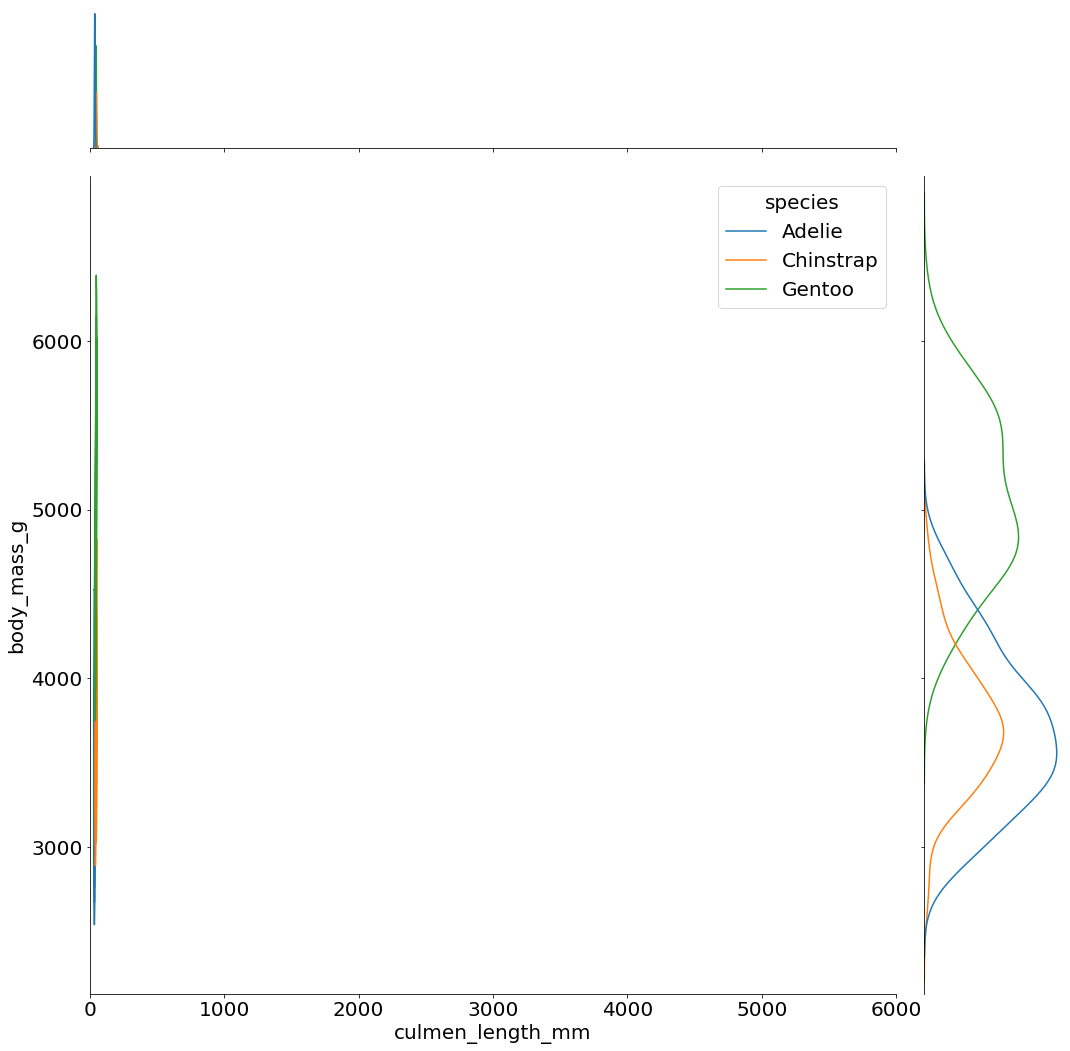

In [3]:
sns.jointplot(data=df_penguin, 
            x="culmen_length_mm", 
            y="body_mass_g",
            kind='kde',
            hue='species',
            xlim=(0,6000),
            height=15);

Can you see the different ranges of scales?

The plot is completely invisible because of the difference of scales. We can try to eliminate such a difference by setting a better `xlim`.


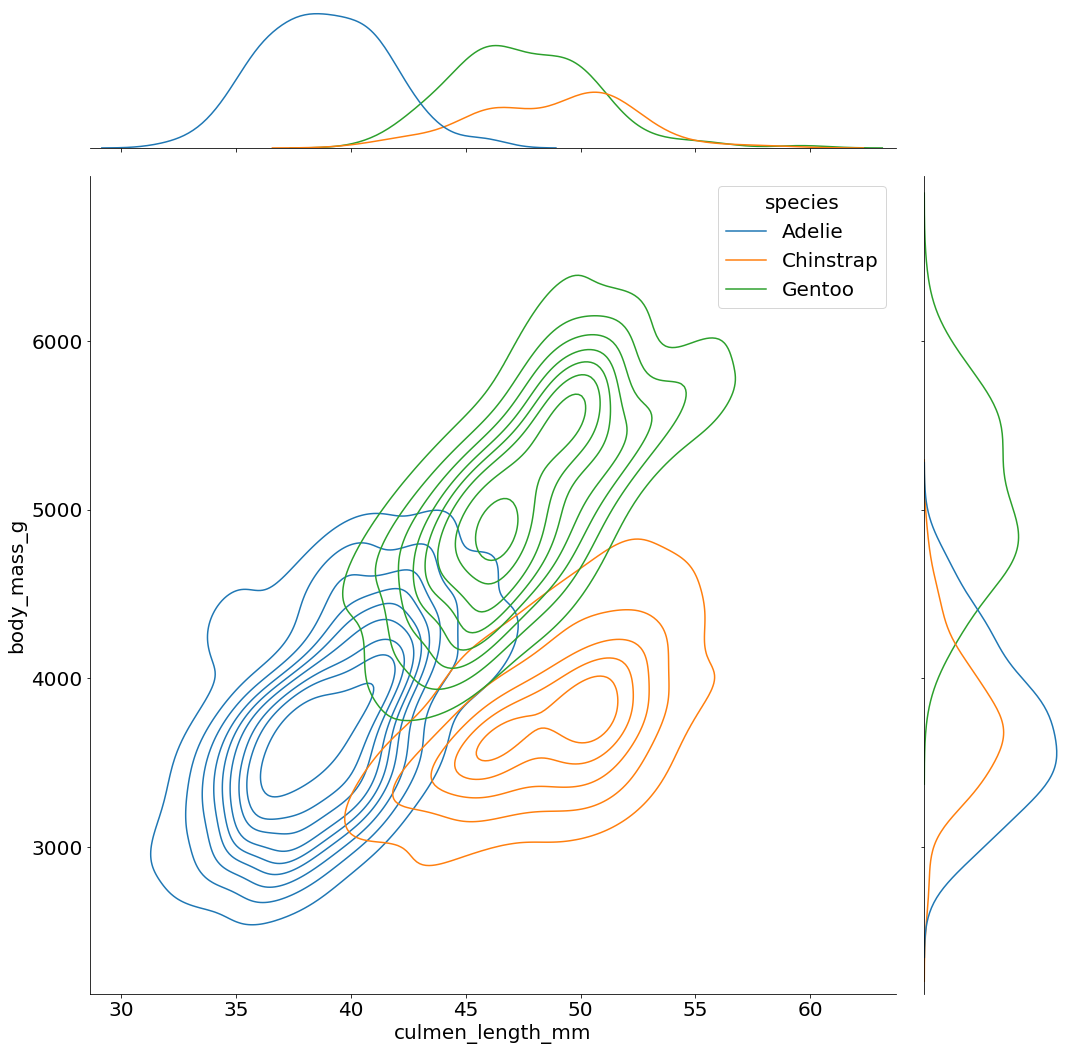

In [4]:
sns.jointplot(data=df_penguin, 
            x="culmen_length_mm", 
            y="body_mass_g",
            kind='kde',
            hue='species',
            height=15);

Let's produce one plot more just to have a hint about the scales (and to review some nice plot commands in seaborn 🙂).

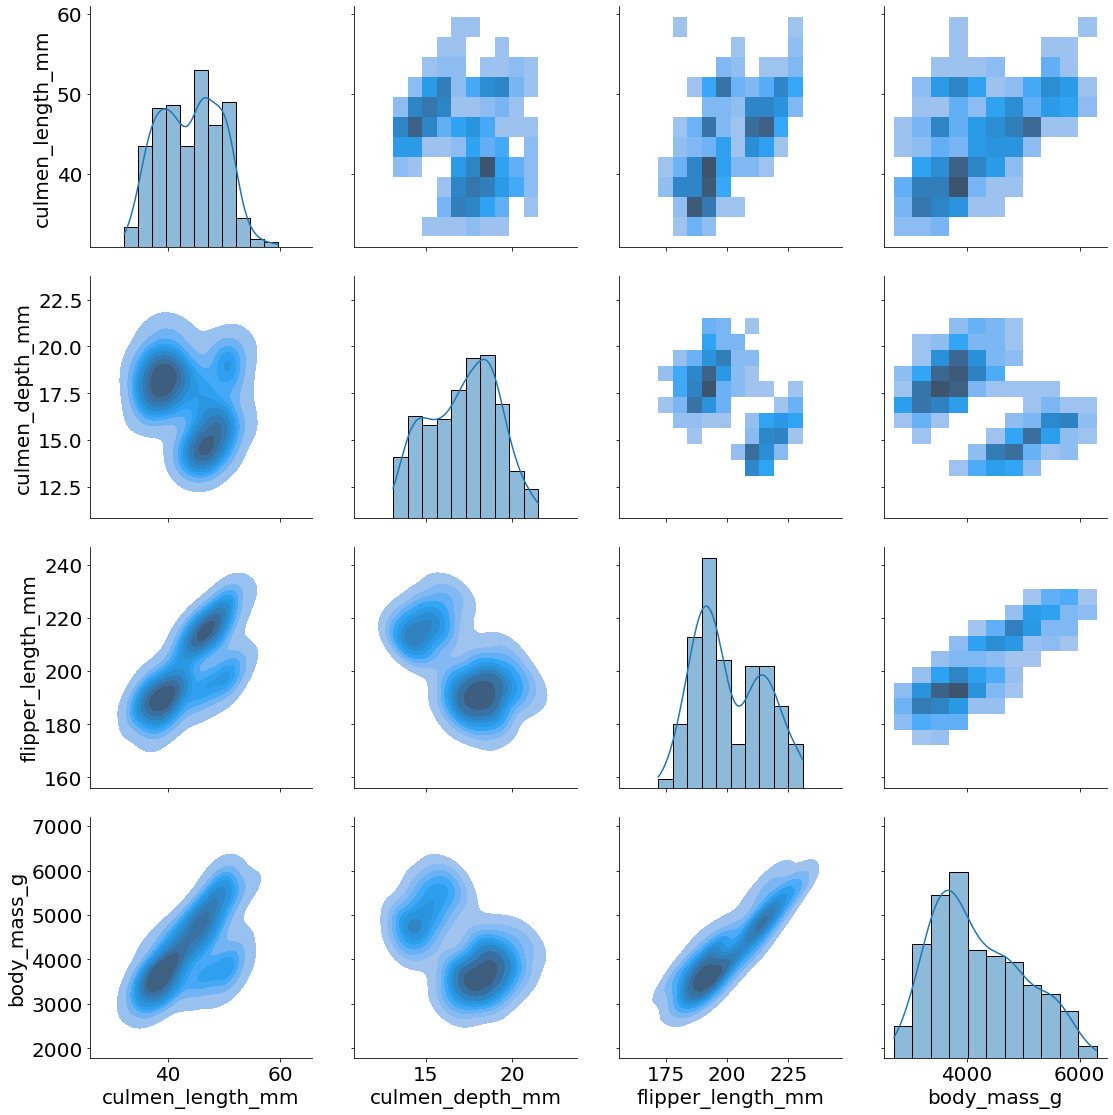

In [5]:
g = sns.PairGrid(df_penguin, height=4)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True);

We can use the old `matplotlib` to compare scales easily.

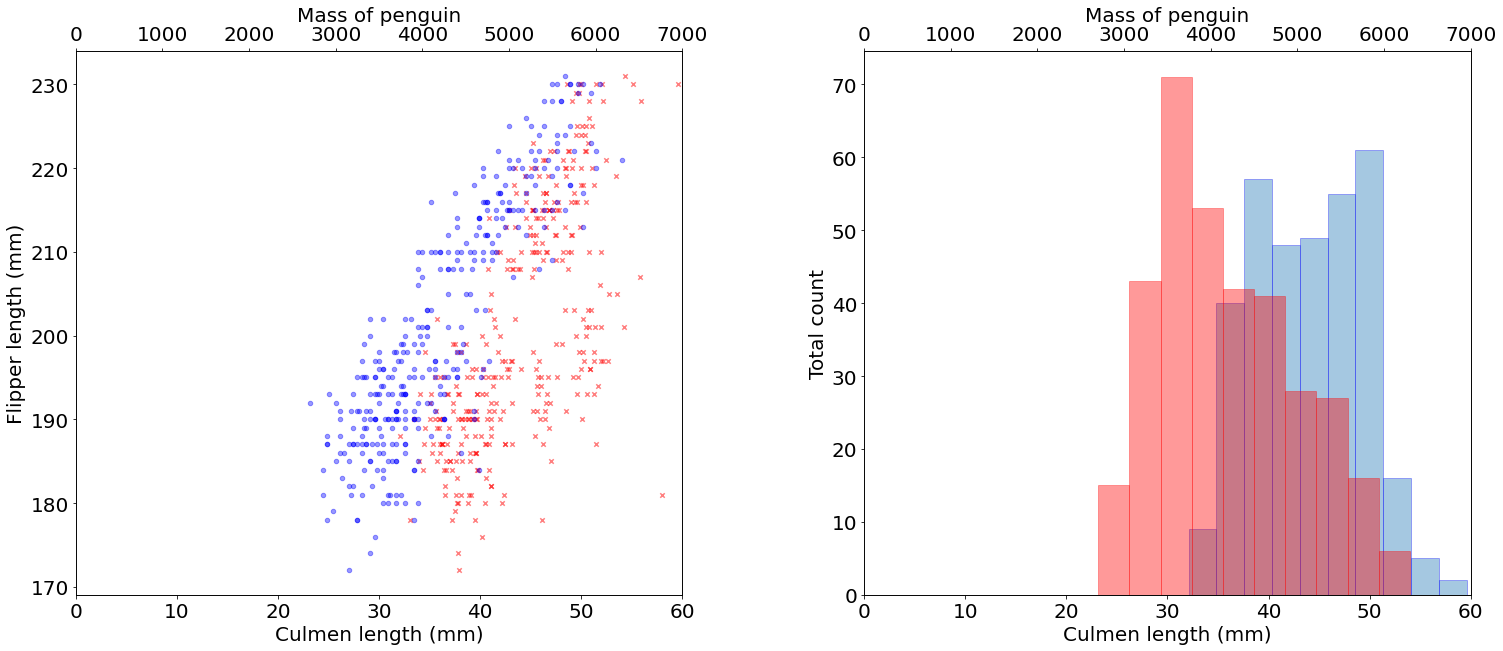

In [6]:
fig = plt.figure(figsize=(25, 10))
fig.subplots_adjust(wspace=0.3)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x = df_penguin[["culmen_length_mm", "body_mass_g"]].values
y = df_penguin[['flipper_length_mm']].values

# Scatter plots:
ax1.scatter(x[:,0], y, marker='x', c='r', alpha=0.5, s=20, label='Culmen length')
ax1.set_xlabel('Culmen length (mm)')
ax1.set_ylabel('Flipper length (mm)')
ax1.set_xlim(0, 60)

ax3 = ax1.twiny()
ax3.scatter(x[:,1], y, marker='o', c='b', alpha=0.4, s=20, label='Mass of penguin')
ax3.set_xlabel('Mass of penguin')
ax3.set_xlim(0, 7000) # try to change this scale to see how this modifies the plot

# Histograms:
ax2.hist(x[:,0], alpha=0.4, edgecolor='b', linewidth=0.8, label='Culmen length')
ax2.set_xlabel('Culmen length (mm)')
ax2.set_ylabel('Total count')
ax2.set_xlim(0, 60)

ax4 = ax2.twiny()
ax4.hist(x[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8, label='Mass of penguin')
ax4.set_xlabel('Mass of penguin')
ax4.set_xlim(0, 7000); # try to change this scale to see how this modifies the plot

--- 

#### Implementing Feature Scaling in Python

We want now to focus on the implementation of feature scaling in python. 
We have already seen the encoders in `sklearn`. 
You will find the scaler objects working in a very similar way. 

We will be applying feature scaling to the [Big Mart dataset](https://raw.githubusercontent.com/akki8087/Big-Mart-Sales/).

In [7]:
data_url = "https://raw.githubusercontent.com/akki8087/Big-Mart-Sales/master/Train.csv"
df = pd.read_csv(data_url)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Before moving on, let’s glance at the details about our data using the `describe` method.

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We can see that there is a huge difference in the range of values present in our numerical features: `Item_Visibility`, `Item_Weight`, `Item_MRP`, and `Outlet_Establishment_Year`. 

Let’s try and fix that using feature scaling!

#### Normalisation using `sklearn`
To normalize your data, you need to import the `MinMaxScaler` from the `sklearn` library and apply it to our dataset. So, let’s do that!

**Exercise** We take into account only numerical variables. How to encode the others is left as an exercise.

In [9]:
# Only numerical variables
X = df[["Item_Weight",	"Item_Visibility",	"Item_MRP"]].values
y = df.Item_Outlet_Sales.values

# fit scaler on training data
scaler = MinMaxScaler().fit(X)

# transform training data
X_norm = scaler.transform(X)

Let’s see how normalization has affected our dataset.

In [12]:
df_norm = pd.DataFrame(X_norm, columns=["Item_Weight",	"Item_Visibility",	"Item_MRP"])

df_norm.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,7060.000000,8523.000000,8523.000000
mean,0.494352,0.201382,0.465635
std,0.276479,0.157123,0.264327
min,0.000000,0.000000,0.000000
25%,0.251191,0.082187,0.265437
50%,0.479012,0.164228,0.474209
75%,0.732063,0.288026,0.655156
max,1.000000,1.000000,1.000000


All the features now have a minimum value of $0$ and a maximum value of $1$. Perfect!

#### Standardisation using `sklearn`

To standardise your data, you need to import the `StandardScaler` from the `sklearn` library and apply it to your dataset, exactly as before.

In [13]:
# fit scaler on training data
scaler = StandardScaler().fit(X)

# transform training data
X_std = scaler.transform(X)

You would have noticed that I only applied standardisation to numerical columns and not the other categorical features. Standardising for instance One-Hot encoded features would mean assigning a distribution to categorical features. You do not want to do that!

Now, let’s have a look at how standardisation has transformed our data.

In [14]:
df_std = pd.DataFrame(X_std, columns=["Item_Weight",	"Item_Visibility",	"Item_MRP"])

df_std.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,7.060000e+03,8.523000e+03,8.523000e+03
mean,4.060963e-16,-1.092117e-16,-1.579818e-16
std,1.000071e+00,1.000059e+00,1.000059e+00
min,-1.788158e+00,-1.281758e+00,-1.761688e+00
25%,-8.795570e-01,-7.586531e-01,-7.574307e-01
50%,-5.548958e-02,-2.364792e-01,3.243893e-02
75%,8.598417e-01,5.514755e-01,7.170372e-01
max,1.829016e+00,5.083050e+00,2.021724e+00


The numerical features are now centred on the mean with a unit standard deviation. Awesome!

### Comparing unscaled, normalised and standardised data

It is always great to visualize your data to understand the distribution present. 
We can see the comparison between our unscaled and scaled data using for example boxplots.

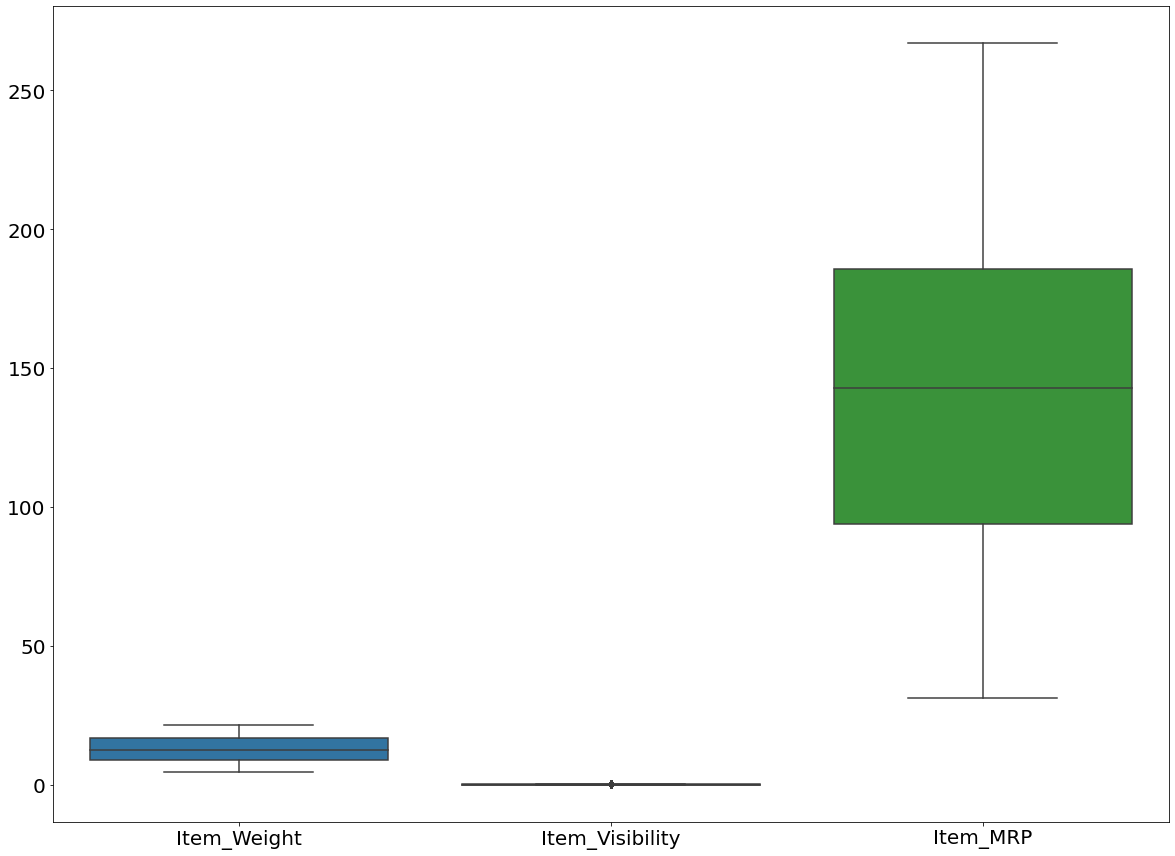

In [16]:
num_cols = ["Item_Weight",	"Item_Visibility",	"Item_MRP"]

#plot unscaled
plt.figure(figsize=(20,15))
sns.boxplot(data=df[num_cols]);

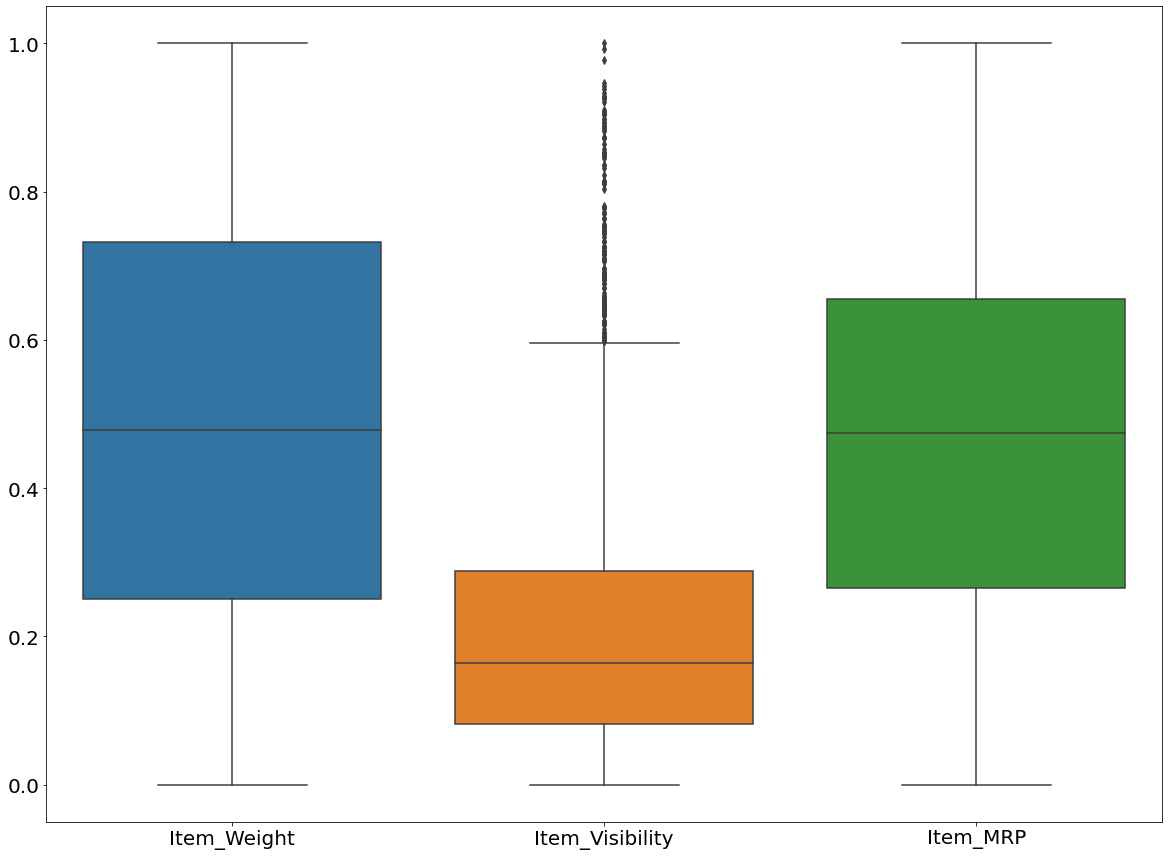

In [17]:
#plot normalised
plt.figure(figsize=(20,15))
sns.boxplot(data=df_norm[num_cols]);

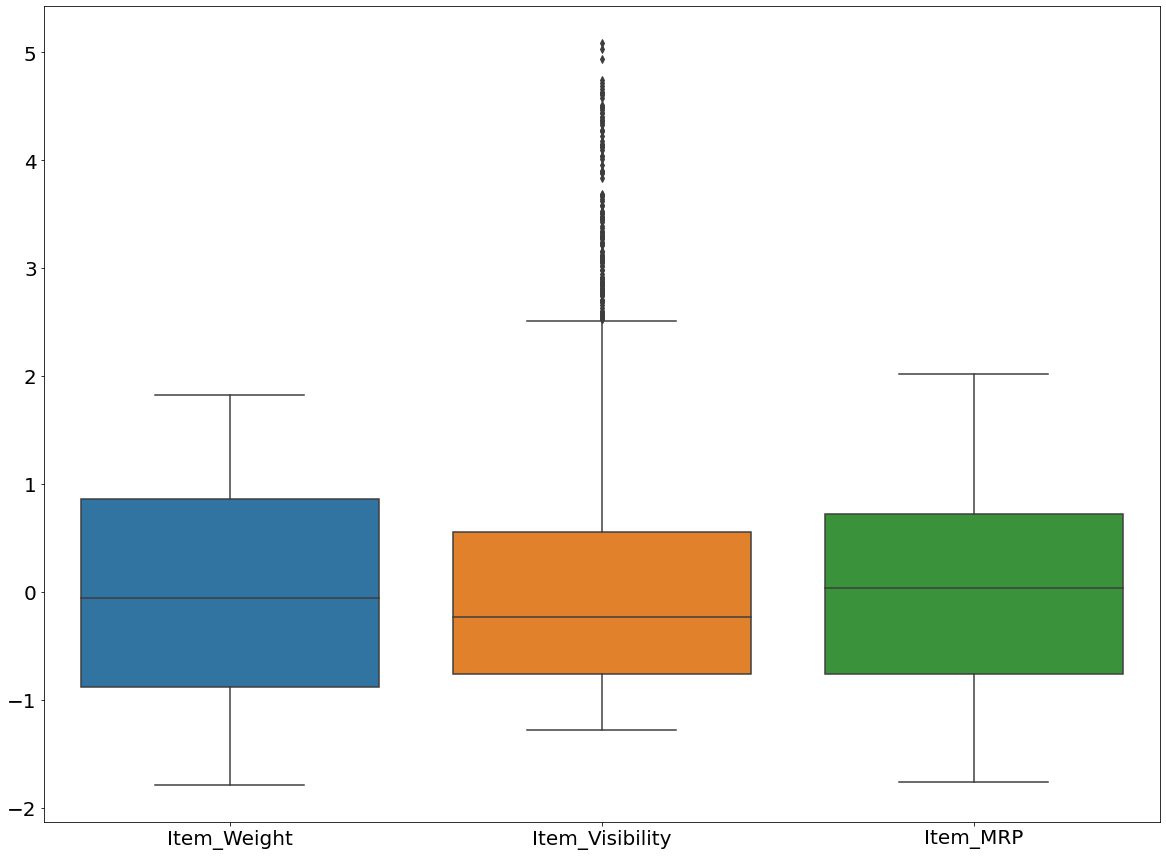

In [18]:
#plot standardised
plt.figure(figsize=(20,15))
sns.boxplot(data=df_std[num_cols]);

#### Exercise 

Perform the feature encoding and feature scaling on the [Big Mart dataset](https://raw.githubusercontent.com/akki8087/Big-Mart-Sales/).
Then apply a linear regression model to predict `Item_Outlet_Sales`.

### End Notes

This lecture covered the relevance of using feature scaling on your data and how normalisation and standardisation have varying effects on the working of machine learning algorithms.
Keep in mind that there is no correct answer to when to use normalisation over standardisation and vice-versa. 
It all depends on your data and the algorithm you are using.


### References

* A great [article](https://jermwatt.github.io/machine_learning_refined/notes/9_Feature_engineer_select/9_3_Scaling.html) about feature scaling with code and excellent visualisations.
* A nice [google developers tutorial](https://developers.google.com/machine-learning/data-prep/transform/normalisation).
* The [wikipedia page](https://en.wikipedia.org/wiki/Feature_scaling) quite well written.
* A simply explained [medium post](https://towardsdatascience.com/understand-data-normalisation-in-machine-learning-8ff3062101f0).
* Another [medium post](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35), with examples.